# Diabetes Prediction CSC 2621 Final Project


### Group Members:
###### Oliver Grudzinski
###### Pranaav Paladugu
###### Alec Weinbender

## Research Question

With this project, we are attempting to see whether we can diagnostically predict whether or not a patient has diabetes, based on the data given to us in the dataset.

## Hypotheses

#### Hypotheses Statements:

Null Hypothesis Example - A given variable does not influence whether a patient may have diabetes.

Alternative Hypothesis Example - A given variable does influence whether a patient may have diabetes.

Examples:

H0 (Glucose) – Glucose levels do not influence whether a patient may have diabetes.

HA (Glucose) – Glucose levels do have an influence on whether a patient may have diabetes.

H0 (BMI) – The patient’s BMI does not influence whether a patient may have diabetes.

HA (BMI) – The patient’s BMI does influence on whether a patient may have diabetes.

H0 (Age) – The patient’s age does not influence whether a patient may have diabetes.

HA (Age) – The patient’s age does influence on whether a patient may have diabetes.

H0 (Diabetes Pedigree Function) – The patient’s DPF levels do not influence whether a patient may have diabetes.

HA (Diabetes Pedigree Function) – The patient’s DPF levels do have an influence on whether a patient may have diabetes.

## Dataset

#### Explanation of the Dataset:

This dataset was created to do what we are doing, which is to diagnostically predict whether or not a patient has diabetes. All of the data in this dataset is taken from female patients that are at least 21 years old and of Pima Indian heritage.

#### Description of Features:
Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

Blood Pressure: Diastolic blood pressure (mm Hg)

Skin Thickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

Diabetes Pedigree Function: Diabetes pedigree function

Age: patient's (years)

#### Target Variable:
The target variable is Outcomes:

Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [24]:
import pandas as pd

df = pd.read_csv("data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
features = df.columns.drop('Outcome').tolist()
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## Data Preprocessing

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    'A': [1, 2, 0],
    'B': [4, 0, 6],
    'C': [7, 8, 9]
})

# Check for zero values
has_zero = df.applymap(lambda x: x == 0).any().any()

print("DataFrame has zero values:", has_zero)

In [27]:
for column in features:
    df[column] = df[column].replace(0, df[column].mean())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


## Data Analysis and Visualization

In [22]:
import matplotlib as plt
import seaborn as sns

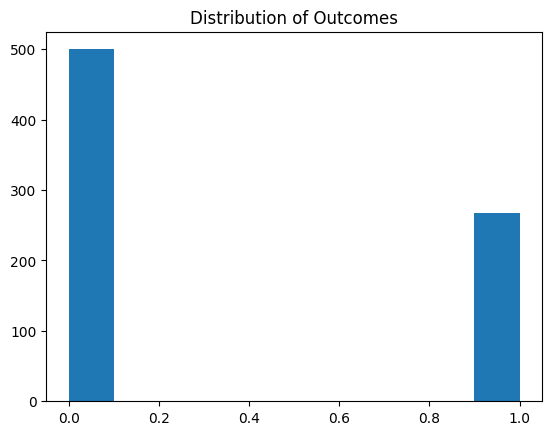

In [9]:
outcomes = df["Outcome"]
plt.hist(outcomes)
plt.title("Distribution of Outcomes")
plt.show()

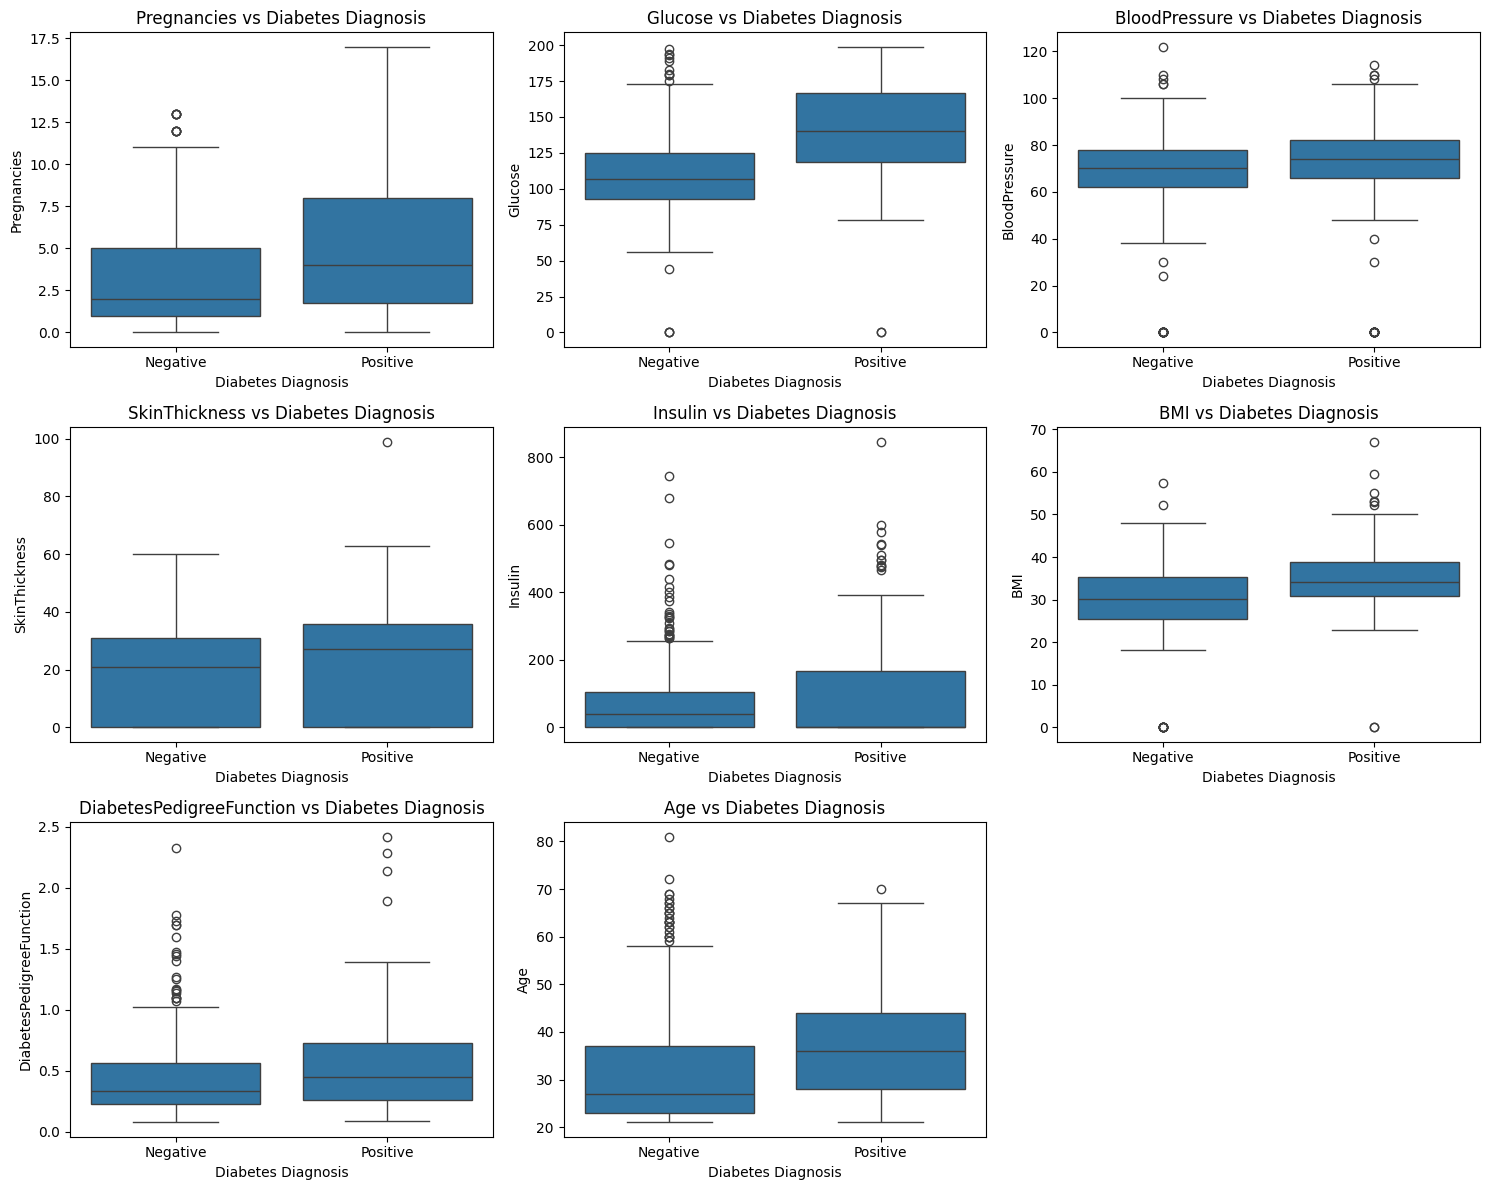

In [15]:
features = df.columns.drop('Outcome')
num_features = len(features)
cols = 3
rows = (num_features + cols - 1) // cols
plt.figure(figsize=(5 * cols, 4 * rows))
for i, feature in enumerate(features):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(x=outcomes, y=df[feature])
    plt.xlabel("Diabetes Diagnosis")
    plt.ylabel(feature)
    plt.xticks([0, 1], ["Negative", "Positive"])
    plt.title(f"{feature} vs Diabetes Diagnosis")

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import stats
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_string_dtype

df = pd.read_csv("data/diabetes.csv")

Outcome = df["Outcome"]

columns_list = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness","Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
Correction = True
length3 = len(df)
count = 0
threshold = (0.05)/8
ColumnsLength = len(df.columns)
Dict = {}
var = []
pval = []
Dict = {"Variable":[], "T-stat": [], "P-value": [], "Correction":[]}
for variable in columns_list:
        samples_by_group = []
        for value in set(df[variable]):
            mask = df[variable] == value
            samples_by_group.append(df['Outcome'][mask])
        kstat, Kp = stats.kruskal(*samples_by_group)
        if(Kp < ((threshold)/length3)):
            Correction = True
        elif(Kp > ((threshold)/length3)):
            Correction = False
        Dict["T-stat"].append(kstat)
        Dict["P-value"].append(Kp)
        pval.append(Kp)
        var.append(variable)
        Dict["Correction"].append(Correction)
        Dict["Variable"].append(variable)

table = pd.DataFrame(Dict)

sorted_df = table.sort_values(by=['P-value'], ascending=True)

sorted_df.head(10)

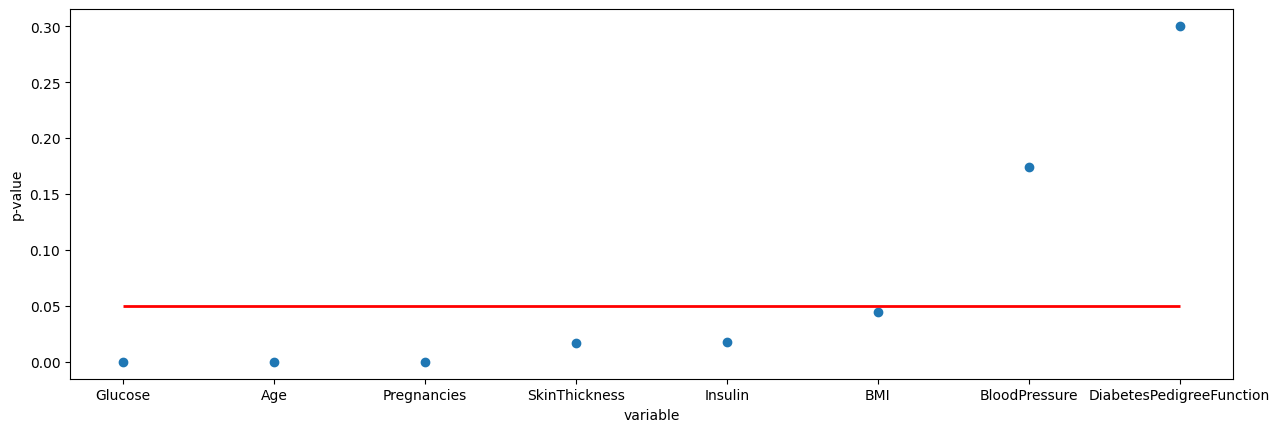

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(sorted_df['Variable'])
y = np.array(sorted_df['P-value'])

f = plt.figure()
f.set_figwidth(15)

plt.xlabel('variable')
plt.ylabel('p-value')

plt.scatter(x, y)
plt.hlines(y=0.05, xmin=0, xmax=7, linewidth=2, color='r')
plt.show()

## Data Modeling and Prediction

## Results Analysis